In [1]:
min=15
print(str(min)+'min')

15min


In [2]:
import codigo
from codigo import utils
from codigo import model_utils

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# Importar Dataset depurado

In [4]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [5]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [6]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [7]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [8]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [9]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [10]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

In [11]:
df=df_Inicial

In [12]:
features=['Glucose level','hour','min','pod_id','level_id']

In [13]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

# Generación de Dataset General

In [14]:
dfIDPacientesTrain = pd.read_csv(r'dataset/generado/IDs_Train.csv')
dfIDPacientesTrain

,ID
0,LIB193277
1,LIB193385
2,LIB193307
3,LIB193309
4,LIB193367
...,...
100,LIB193282
101,LIB193366
102,LIB193398
103,LIB193283


In [15]:
# Generamos train validation and test 
# ratio of training data set (96%, 2% for validation and 2% for testing)
train_share = 0.90
#ration of validation data set (2%)
val_share = 0.95 
lag=30
n_ahead=1

dfGen,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df,features,dfIDPacientesTrain['ID'],15,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId)

In [16]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'wb') as f:
    np.save(f, array_Xtrain)

In [17]:
len(array_Ytrain)

4251565

In [18]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'wb') as f:
    np.save(f, array_Ytrain)

In [19]:
len(array_Xval)

88575

In [20]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'wb') as f:
    np.save(f, array_Xval)

In [21]:
len(array_Yval)

88575

In [22]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'wb') as f:
    np.save(f, array_Yval)

In [23]:
len(array_Xtest)

88632

In [24]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'wb') as f:
    np.save(f, array_Xtest)

In [25]:
len(array_Ytest)

88632

In [26]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'wb') as f:
    np.save(f, array_Ytest)

In [33]:
array_Ytrain_scaled=scalerGlucosa.inverse_transform(array_Ytrain)

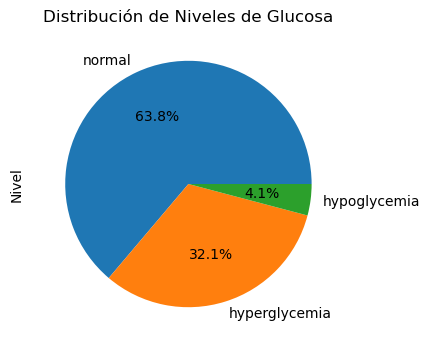

In [38]:
df_Ytrain_scaled = pd.DataFrame(array_Ytrain_scaled, columns=['Glucose level']) 
df_Ytrain_scaled['Nivel'] = df_Ytrain_scaled['Glucose level'].apply(utils.label_LevelBG) 
df_Ytrain_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [39]:
df_Ytrain_scaled['Nivel'].value_counts()

normal           2713056
hyperglycemia    1363668
hypoglycemia      174841
Name: Nivel, dtype: int64

In [37]:
df_Y_scaled

,Glucose level
0,203.0
1,197.0
2,205.0
3,209.0
4,204.0
...,...
4251560,171.0
4251561,176.0
4251562,181.0
4251563,188.0


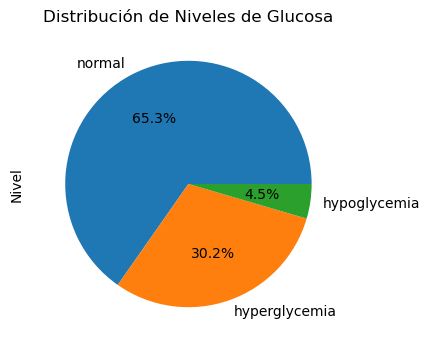

In [40]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG) 
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [43]:
df_Yval_scaled['Nivel'].value_counts()

normal           57819
hyperglycemia    26745
hypoglycemia      4011
Name: Nivel, dtype: int64

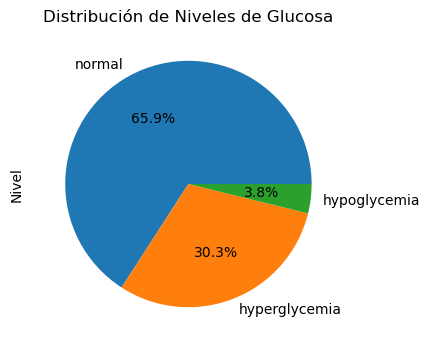

In [41]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)

df_Ytest_scaled = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level']) 
df_Ytest_scaled['Nivel'] = df_Ytest_scaled['Glucose level'].apply(utils.label_LevelBG) 
df_Ytest_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Ytest_scaled['Nivel'].value_counts()

normal           58380
hyperglycemia    26856
hypoglycemia      3396
Name: Nivel, dtype: int64